In [19]:
# %% 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# %% zd1
df = pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [6]:
# %% zd2
df_gr = df.groupby(['race', 'signs_of_mental_illness']).size().reset_index(name='Death_count')
df_gr

,race,signs_of_mental_illness,Death_count
0,A,False,69
1,A,True,24
2,B,False,1114
3,B,True,184
4,H,False,745
5,H,True,157
6,N,False,64
7,N,True,14
8,O,False,37
9,O,True,11


In [7]:
# %% zd3
df_2 = df.groupby('race')['signs_of_mental_illness'].apply(lambda x: (x[x == True].count()) / (x.count()) * 100).reset_index(name='per_mental_illness')
#df_2 = df.groupby('race').apply(lambda x: (x[x['signs_of_mental_illness'] == True].shape[0] / x.shape[0]) * 100).reset_index(name='per_mental_illness')
df_2

,race,per_mental_illness
0,A,25.806452
1,B,14.175655
2,H,17.405765
3,N,17.948718
4,O,22.916667
5,W,28.796446


In [8]:
# %%
df_max = df_2.loc[df_2['per_mental_illness'].idxmax()]
# Odp. Rasa W charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.
df_max

race                          W
per_mental_illness    28.796446
Name: 5, dtype: object

In [11]:
df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
# zd4
df['day_of_week'] = df['date'].dt.day_name()
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [24]:
df_by_day = df.groupby('day_of_week').size().reset_index(name='intervention_by_day')
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_by_day['day_of_week'] = pd.Categorical(df_by_day['day_of_week'], categories=ordered_days, ordered=True)
df_by_day = df_by_day.sort_values('day_of_week')
df_by_day

,day_of_week,intervention_by_day
1,Monday,726
5,Tuesday,816
6,Wednesday,829
4,Thursday,810
0,Friday,761
2,Saturday,721
3,Sunday,753


Text(0, 0.5, 'Sum of interrvensions')

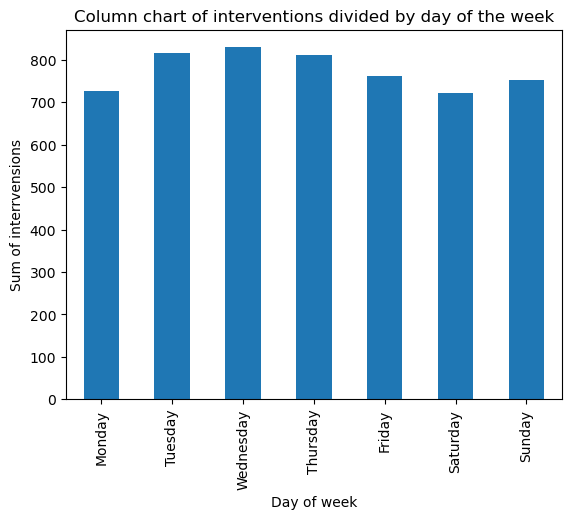

In [25]:
df_by_day.plot(kind='bar', x='day_of_week', y='intervention_by_day', legend=False)
plt.title('Column chart of interventions divided by day of the week')
plt.xlabel('Day of week')
plt.ylabel('Sum of interrvensions')

In [55]:
# zd5
df_1 = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)[0]
df_1

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,38538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%
5,6,5,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%
6,7,7,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%
7,8,9,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%
8,9,10,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%
9,10,8,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%


In [108]:
df_1 = df_1.iloc[:, [2, 3]]
df_1

,State,"Census population, April 1, 2020 [1][2]"
0,California,38538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700
5,Illinois,12812508
6,Ohio,11799448
7,Georgia,10711908
8,North Carolina,10439388
9,Michigan,10077331


In [94]:
df_2 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=1)[0]
df_2 = df_2.iloc[7:, :]
df_2.head(10)

,Codes:,Codes:.1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
7,Name and status of region,Name and status of region,ISO,ANSI,ANSI,USPS,USCG,GPO,AP,Other abbreviations
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPO,AP,Other abbreviations
9,United States of America,Federal state,US USA 840,US,00,NaN,NaN,U.S.,U.S.,U.S.A.
10,Alabama,State,US-AL,AL,01,AL,AL,Ala.,Ala.,NaN
11,Alaska,State,US-AK,AK,02,AK,AK,Alaska,Alaska,Ak.[1]
12,Arizona,State,US-AZ,AZ,04,AZ,AZ,Ariz.,Ariz.,NaN
13,Arkansas,State,US-AR,AR,05,AR,AR,Ark.,Ark.,NaN
14,California,State,US-CA,CA,06,CA,CF,Calif.,Calif.,Cal.
15,Colorado,State,US-CO,CO,08,CO,CL,Colo.,Colo.,NaN
16,Connecticut,State,US-CT,CT,09,CT,CT,Conn.,Conn.,NaN


In [103]:
new_header = ['Name and status of region'] + list(df_2.iloc[0,1:])
new_header

['Name and status of region',
 'Name and status of region',
 'ISO',
 'ANSI',
 'ANSI',
 'USPS',
 'USCG',
 'GPO',
 'AP',
 'Other abbreviations']

In [105]:
df_2.columns = new_header
df_2

,Name and status of region,Name and status of region,ISO,ANSI,ANSI,USPS,USCG,GPO,AP,Other abbreviations
7,Name and status of region,Name and status of region,ISO,ANSI,ANSI,USPS,USCG,GPO,AP,Other abbreviations
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPO,AP,Other abbreviations
9,United States of America,Federal state,US USA 840,US,00,NaN,NaN,U.S.,U.S.,U.S.A.
10,Alabama,State,US-AL,AL,01,AL,AL,Ala.,Ala.,NaN
11,Alaska,State,US-AK,AK,02,AK,AK,Alaska,Alaska,Ak.[1]
...,...,...,...,...,...,...,...,...,...,...
82,Nebraska,Obsolete postal code[g],NaN,NaN,NaN,NB,NaN,NaN,NaN,NaN
83,Northern Mariana Islands,Obsolete postal code[h],NaN,NaN,NaN,CM,NaN,NaN,NaN,NaN
84,Panama Canal Zone,Obsolete postal code,PZ PCZ 594,NaN,NaN,CZ,NaN,NaN,NaN,NaN
85,Philippine Islands,Obsolete postal code,PH PHL 608[10],NaN,NaN,PI,NaN,NaN,NaN,NaN


In [106]:
df_2 = df_2[1:]
df_2

,Name and status of region,Name and status of region,ISO,ANSI,ANSI,USPS,USCG,GPO,AP,Other abbreviations
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPO,AP,Other abbreviations
9,United States of America,Federal state,US USA 840,US,00,NaN,NaN,U.S.,U.S.,U.S.A.
10,Alabama,State,US-AL,AL,01,AL,AL,Ala.,Ala.,NaN
11,Alaska,State,US-AK,AK,02,AK,AK,Alaska,Alaska,Ak.[1]
12,Arizona,State,US-AZ,AZ,04,AZ,AZ,Ariz.,Ariz.,NaN
...,...,...,...,...,...,...,...,...,...,...
82,Nebraska,Obsolete postal code[g],NaN,NaN,NaN,NB,NaN,NaN,NaN,NaN
83,Northern Mariana Islands,Obsolete postal code[h],NaN,NaN,NaN,CM,NaN,NaN,NaN,NaN
84,Panama Canal Zone,Obsolete postal code,PZ PCZ 594,NaN,NaN,CZ,NaN,NaN,NaN,NaN
85,Philippine Islands,Obsolete postal code,PH PHL 608[10],NaN,NaN,PI,NaN,NaN,NaN,NaN


In [107]:
df_2 = df_2.reset_index(drop=True)
df_2

,Name and status of region,Name and status of region,ISO,ANSI,ANSI,USPS,USCG,GPO,AP,Other abbreviations
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPO,AP,Other abbreviations
1,United States of America,Federal state,US USA 840,US,00,NaN,NaN,U.S.,U.S.,U.S.A.
2,Alabama,State,US-AL,AL,01,AL,AL,Ala.,Ala.,NaN
3,Alaska,State,US-AK,AK,02,AK,AK,Alaska,Alaska,Ak.[1]
4,Arizona,State,US-AZ,AZ,04,AZ,AZ,Ariz.,Ariz.,NaN
...,...,...,...,...,...,...,...,...,...,...
74,Nebraska,Obsolete postal code[g],NaN,NaN,NaN,NB,NaN,NaN,NaN,NaN
75,Northern Mariana Islands,Obsolete postal code[h],NaN,NaN,NaN,CM,NaN,NaN,NaN,NaN
76,Panama Canal Zone,Obsolete postal code,PZ PCZ 594,NaN,NaN,CZ,NaN,NaN,NaN,NaN
77,Philippine Islands,Obsolete postal code,PH PHL 608[10],NaN,NaN,PI,NaN,NaN,NaN,NaN


In [109]:
df_2 = df_2.iloc[:, [0, 5]]
df_2

,Name and status of region,USPS
0,NaN,NaN
1,United States of America,NaN
2,Alabama,AL
3,Alaska,AK
4,Arizona,AZ
...,...,...
74,Nebraska,NB
75,Northern Mariana Islands,CM
76,Panama Canal Zone,CZ
77,Philippine Islands,PI


In [112]:
df_joined = pd.merge(df_1, df_2, left_on='State', right_on='Name and status of region', how='inner')
df_joined

,State,"Census population, April 1, 2020 [1][2]",Name and status of region,USPS
0,California,38538223,California,CA
1,Texas,30145505,Texas,TX
2,Florida,21538187,Florida,FL
3,New York,20201249,New York,NY
4,Pennsylvania,13002700,Pennsylvania,PA
5,Illinois,12812508,Illinois,IL
6,Ohio,11799448,Ohio,OH
7,Georgia,10711908,Georgia,GA
8,North Carolina,10439388,North Carolina,NC
9,Michigan,10077331,Michigan,MI


In [113]:
df_by_state = df.groupby('state').size().reset_index(name='incidents_count_by_state')
df_by_state

,state,incidents_count_by_state
0,AK,39
1,AL,104
2,AR,83
3,AZ,254
4,CA,799
5,CO,195
6,CT,21
7,DC,13
8,DE,13
9,FL,350


In [117]:
df_main = pd.merge(df_joined, df_by_state, left_on='USPS', right_on='state', how='inner')
df_main

,State,"Census population, April 1, 2020 [1][2]",Name and status of region,USPS,state,incidents_count_by_state
0,California,38538223,California,CA,CA,799
1,Texas,30145505,Texas,TX,TX,481
2,Florida,21538187,Florida,FL,FL,350
3,New York,20201249,New York,NY,NY,101
4,Pennsylvania,13002700,Pennsylvania,PA,PA,108
5,Illinois,12812508,Illinois,IL,IL,104
6,Ohio,11799448,Ohio,OH,OH,155
7,Georgia,10711908,Georgia,GA,GA,182
8,North Carolina,10439388,North Carolina,NC,NC,156
9,Michigan,10077331,Michigan,MI,MI,78


In [119]:
df_main = df_main.rename(columns={'Census population, April 1, 2020 [1][2]': 'Population'})
df_main

,State,Population,Name and status of region,USPS,state,incidents_count_by_state
0,California,38538223,California,CA,CA,799
1,Texas,30145505,Texas,TX,TX,481
2,Florida,21538187,Florida,FL,FL,350
3,New York,20201249,New York,NY,NY,101
4,Pennsylvania,13002700,Pennsylvania,PA,PA,108
5,Illinois,12812508,Illinois,IL,IL,104
6,Ohio,11799448,Ohio,OH,OH,155
7,Georgia,10711908,Georgia,GA,GA,182
8,North Carolina,10439388,North Carolina,NC,NC,156
9,Michigan,10077331,Michigan,MI,MI,78


In [123]:
df_main['intervensions_per_1000'] = (df_main['incidents_count_by_state'] / df_main['Population']) * 1000
df_main

,State,Population,Name and status of region,USPS,state,incidents_count_by_state,intervensions_per_1000
0,California,38538223,California,CA,CA,799,0.020733
1,Texas,30145505,Texas,TX,TX,481,0.015956
2,Florida,21538187,Florida,FL,FL,350,0.016250
3,New York,20201249,New York,NY,NY,101,0.005000
4,Pennsylvania,13002700,Pennsylvania,PA,PA,108,0.008306
5,Illinois,12812508,Illinois,IL,IL,104,0.008117
6,Ohio,11799448,Ohio,OH,OH,155,0.013136
7,Georgia,10711908,Georgia,GA,GA,182,0.016990
8,North Carolina,10439388,North Carolina,NC,NC,156,0.014943
9,Michigan,10077331,Michigan,MI,MI,78,0.007740
